In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.linear_model import LinearRegression
from datetime import datetime, timedelta

<ipython-input-1-8c7956592b24>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Load data
data = pd.read_csv('./ONS_Data.csv')

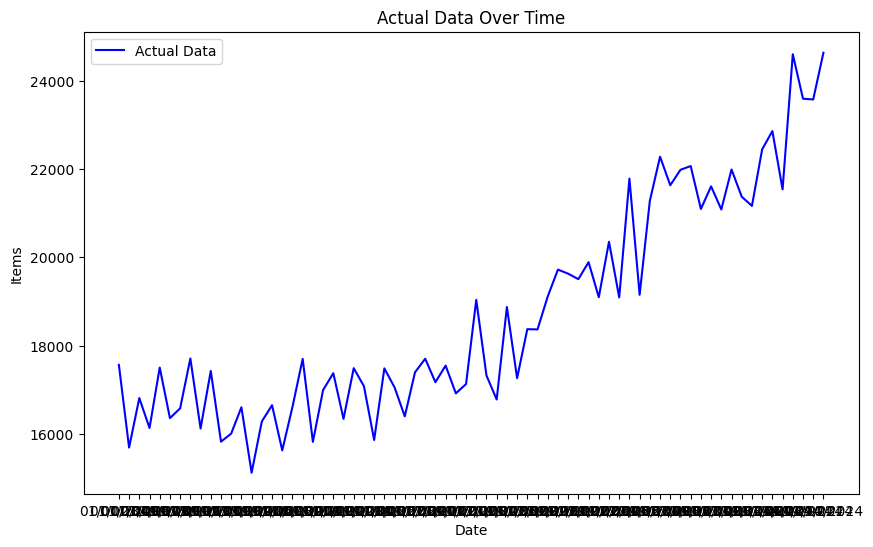

In [3]:
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(data['Month'], data['Items'], label='Actual Data', color='blue')  # Plot the actual data

# Add titles and labels
plt.title('Actual Data Over Time')
plt.xlabel('Date')
plt.ylabel('Items')

# Add a legend
plt.legend()

# Display the plot
plt.show()


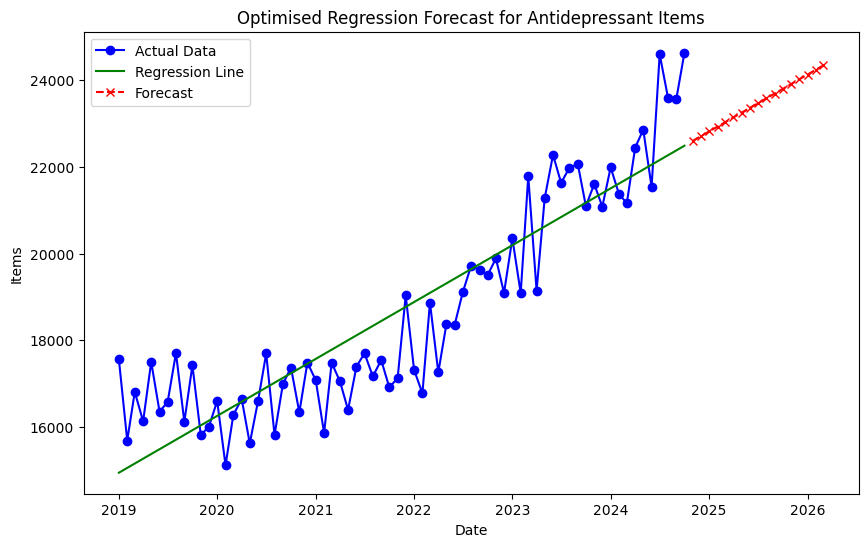

In [4]:
# Convert 'Month' to datetime and numerical format for regression
data['Month'] = pd.to_datetime(data['Month'], format='%d/%m/%Y')
data['Month_Num'] = (data['Month'] - data['Month'].min()).dt.days

# Train the linear regression model
X = data[['Month_Num']].values  # Independent variable
y = data['Items'].values        # Dependent variable
model = LinearRegression()
model.fit(X, y)

# Generate future dates for prediction
future_months = [data['Month'].max() + pd.DateOffset(months=i) for i in range(1, 18)]
future_month_nums = [(month - data['Month'].min()).days for month in future_months]
future_X = np.array(future_month_nums).reshape(-1, 1)

# Predict future values
future_items = model.predict(future_X)

# Combine actual and forecasted data for plotting
forecast_item_data = pd.DataFrame({
    'Month': future_months,
    'Items': future_items
})

# Plot the actual data
plt.figure(figsize=(10, 6))
plt.plot(data['Month'], data['Items'], label='Actual Data', color='blue', marker='o')

# Plot the regression line for historical data
plt.plot(data['Month'], model.predict(X), label='Regression Line', color='green')

# Plot the forecasted data
plt.plot(forecast_item_data['Month'], forecast_item_data['Items'], label='Forecast', color='red', linestyle='--', marker='x')

# Add titles and labels
plt.title('Optimised Regression Forecast for Antidepressant Items')
plt.xlabel('Date')
plt.ylabel('Items')

# Add a legend
plt.legend()

# Display the plot
plt.show()

In [5]:
# See last 12m actual data
print(data.tail(12))

        Month  Items    Spend  Month_Num
58 2023-11-01  21607  1114858       1765
59 2023-12-01  21083  1113387       1795
60 2024-01-01  21989  1159344       1826
61 2024-02-01  21372  1182993       1857
62 2024-03-01  21164  1166293       1886
63 2024-04-01  22445  1297815       1917
64 2024-05-01  22859  1333243       1947
65 2024-06-01  21539  1252750       1978
66 2024-07-01  24600  1420567       2008
67 2024-08-01  23593  1364477       2039
68 2024-09-01  23576  1350137       2070
69 2024-10-01  24635  1429255       2100


In [6]:
# See forecast item data
print(forecast_item_data)

        Month         Items
0  2024-11-01  22600.935288
1  2024-12-01  22708.697475
2  2025-01-01  22820.051734
3  2025-02-01  22931.405994
4  2025-03-01  23031.984035
5  2025-04-01  23143.338294
6  2025-05-01  23251.100481
7  2025-06-01  23362.454740
8  2025-07-01  23470.216927
9  2025-08-01  23581.571187
10 2025-09-01  23692.925446
11 2025-10-01  23800.687633
12 2025-11-01  23912.041892
13 2025-12-01  24019.804079
14 2026-01-01  24131.158339
15 2026-02-01  24242.512598
16 2026-03-01  24343.090639


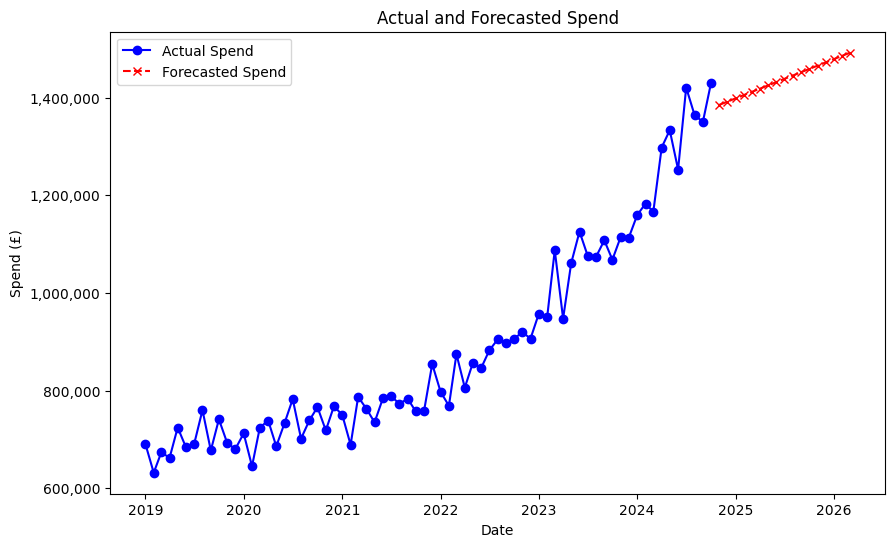

        Month  Forecasted Spend
0  2024-11-01         1,385,116
1  2024-12-01         1,391,720
2  2025-01-01         1,398,545
3  2025-02-01         1,405,369
4  2025-03-01         1,411,533
5  2025-04-01         1,418,358
6  2025-05-01         1,424,962
7  2025-06-01         1,431,786
8  2025-07-01         1,438,391
9  2025-08-01         1,445,215
10 2025-09-01         1,452,040
11 2025-10-01         1,458,644
12 2025-11-01         1,465,468
13 2025-12-01         1,472,073
14 2026-01-01         1,478,897
15 2026-02-01         1,485,721
16 2026-03-01         1,491,885
67    1364477
68    1350137
69    1429255
Name: Spend, dtype: int64
[1.00277016 1.00755141 1.01249204 1.01743266 1.02189516 1.02683578
 1.03161703 1.03655766 1.04133891 1.04627953 1.05122015 1.0560014
 1.06094203 1.06572328 1.0706639  1.07560453 1.08006702]


In [7]:
# Calculate the proportional growth pattern from Items
recent_items = data['Items'].tail(12).mean() # 3m default. But if recent item growth is unusually high and may be sustained then use a longer tail to ensure that this is reflected in the growth rate when comparing against future items
growth_factor = future_items / recent_items  # Growth pattern based on items regression

# Apply growth factor to actual spend
recent_spend = data['Spend'].tail(3).mean() # 3m default. But if recent price growth is substantial then use a longer tail to dilute these unpredictable effects, unless there is reason there is reason to expect the price increase will be sustained.
future_spend = growth_factor * recent_spend

# Create a DataFrame for forecasted spend
forecast_spend_data = pd.DataFrame({
    'Month': future_months[:len(future_spend)],  # Use the same number of months as forecasted spend
    'Forecasted Spend': future_spend
})

# Plots
plt.figure(figsize=(10, 6))

# Plot actual spend
plt.plot(data['Month'], data['Spend'], label='Actual Spend', color='blue', marker='o')

# Plot forecasted spend
plt.plot(forecast_spend_data['Month'], forecast_spend_data['Forecasted Spend'],
         label='Forecasted Spend', color='red', linestyle='--', marker='x')

# Add titles and labels
plt.title('Actual and Forecasted Spend')
plt.xlabel('Date')
plt.ylabel('Spend (£)')
plt.legend()

# Format axis
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Display the plot
plt.show()

# Display forecasted spend data
pd.options.display.float_format = '{:,.0f}'.format
print(forecast_spend_data)

print(data['Spend'].tail(3))
print(growth_factor)

In [8]:
# Rename columns in forecast_spend_data to match the actual spend data
forecast_spend_data.rename(columns={'Forecasted Spend': 'Spend'}, inplace=True)

# Concatenate the two datasets
hybrid_data = pd.concat([data[['Month', 'Spend']], forecast_spend_data], ignore_index=True)

# Sort by 'Month' to ensure chronological order
hybrid_data.sort_values(by='Month', inplace=True)

# Reset the index
hybrid_data.reset_index(drop=True, inplace=True)

# Save the hybrid data to a CSV file
hybrid_data.to_csv('hybrid_data.csv', index=False)

print(hybrid_data)


        Month     Spend
0  2019-01-01   690,966
1  2019-02-01   631,969
2  2019-03-01   673,415
3  2019-04-01   662,690
4  2019-05-01   724,504
..        ...       ...
82 2025-11-01 1,465,468
83 2025-12-01 1,472,073
84 2026-01-01 1,478,897
85 2026-02-01 1,485,721
86 2026-03-01 1,491,885

[87 rows x 2 columns]


In [14]:
# Identify the current annual growth % forecast (this is only needed to provide context for the user in thinking about a modified %)
# Define the date ranges for the two periods
previous_period_start = pd.Timestamp('2024-04-01')
previous_period_end = pd.Timestamp('2025-03-31')
forecast_period_start = pd.Timestamp('2025-04-01')
forecast_period_end = pd.Timestamp('2026-03-31')

# Filter the hybrid data for the previous period (2024-04-01 to 2025-03-31)
previous_period_data = hybrid_data[
    (hybrid_data['Month'] >= previous_period_start) &
    (hybrid_data['Month'] <= previous_period_end)
]

# Filter the hybrid data for the forecast period (2025-04-01 to 2026-03-31)
forecast_period_data = hybrid_data[
    (hybrid_data['Month'] >= forecast_period_start) &
    (hybrid_data['Month'] <= forecast_period_end)
]

# Calculate monthly growth rates in the forecast period
forecast_period_data['Growth_Rate'] = forecast_period_data['Spend'].pct_change()

# Calculate the average monthly growth rate (ignoring NaN from the first row)
average_monthly_growth_rate = forecast_period_data['Growth_Rate'].mean()

# Convert to percentage for display
average_monthly_growth_rate_percentage = average_monthly_growth_rate * 100

print(f"Average Monthly Growth Rate in Forecast Period: {average_monthly_growth_rate_percentage:.4f}%")

<ipython-input-14-5e180a180a1d>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecast_period_data['Growth_Rate'] = forecast_period_data['Spend'].pct_change()


Average Monthly Growth Rate in Forecast Period: 0.4605%


In [15]:
# Calculate the annual growth rate from the average monthly growth rate
annual_growth_rate = (1 + average_monthly_growth_rate) ** 12 - 1

# Convert to percentage for display
annual_growth_rate_percentage = annual_growth_rate * 100

print(f"Annual Growth Rate Expected in Forecast Period: {annual_growth_rate_percentage:.4f}%")


Annual Growth Rate Expected in Forecast Period: 5.6684%


In [17]:
## Enter Modified Annual Growth % and convert to monthly %

# Prompt the user to input the modified annual growth rate (in percentage)
modified_annual_growth_rate = float(input("Enter the modified annual growth rate (as a percentage): ")) / 100

<class 'TypeError'>: float() argument must be a string or a real number, not 'PyodideFuture'

Enter the modified annual growth rate (as a percentage):  5.66


In [23]:
#### Calculate predicted monthly growth rate
modified_monthly_growth_rate = (1 + 0.036684)**(1/12) - 1

# Convert to percentage for display
modified_monthly_growth_rate_percentage = modified_monthly_growth_rate * 100

print(f"Modified Predicted Monthly Growth Rate: {modified_monthly_growth_rate_percentage:.4f}%")

Modified Predicted Monthly Growth Rate: 0.3007%


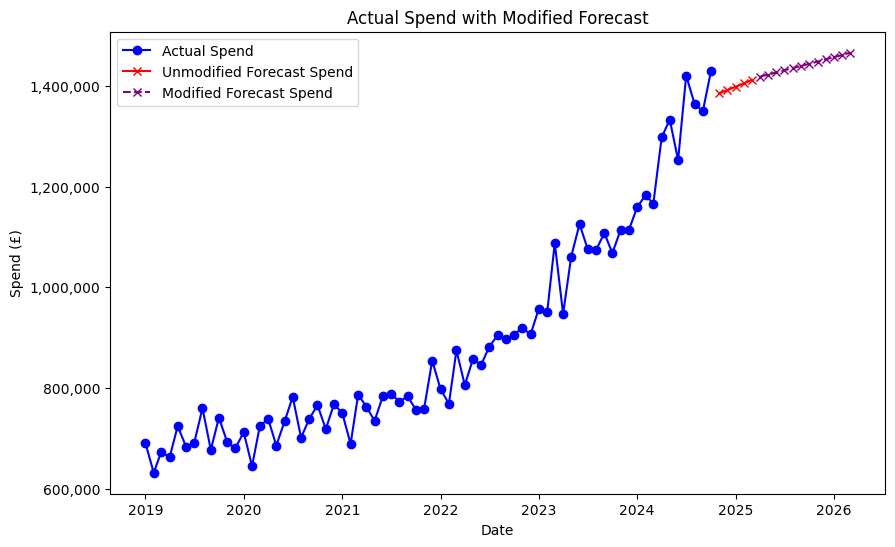

        Month  Modified Forecast Spend
0  2025-04-01                1,418,358
1  2025-05-01                1,422,622
2  2025-06-01                1,426,900
3  2025-07-01                1,431,190
4  2025-08-01                1,435,493
5  2025-09-01                1,439,810
6  2025-10-01                1,444,139
7  2025-11-01                1,448,481
8  2025-12-01                1,452,836
9  2026-01-01                1,457,205
10 2026-02-01                1,461,586
11 2026-03-01                1,465,981


In [24]:
# Define the monthly growth rate
monthly_growth_rate = modified_monthly_growth_rate_percentage/100

# Identify the spend value for the single month of 2025-04-01
baseline_spend = hybrid_data[hybrid_data['Month'] == pd.Timestamp('2025-03-01')]['Spend'].values[0]

# Generate the forecasted spend values for the next 12 months based on the average spend and monthly growth
modified_forecasted_spend_values = []
for i in range(12):
    # Calculate the forecasted spend for each month by applying the growth rate
    modified_forecasted_spend = baseline_spend * (1 + monthly_growth_rate) ** i
    modified_forecasted_spend_values.append(modified_forecasted_spend)

# Generate corresponding months for the forecast period (2025-04-01 to 2026-03-01)
forecast_months = pd.date_range(start='2025-04-01', periods=12, freq='MS')

# Create a DataFrame for the forecasted spend values
modified_forecast_spend_data = pd.DataFrame({
    'Month': forecast_months,
    'Modified Forecast Spend': modified_forecasted_spend_values
})

# Filter hybrid_data for plotting
filtered_hybrid_data = hybrid_data[
    (hybrid_data['Month'] >= pd.Timestamp('2024-11-01')) &
    (hybrid_data['Month'] <= pd.Timestamp('2025-03-01'))
]

# Plot the actual and forecasted spend values
plt.figure(figsize=(10, 6))

# Plot actual spend
plt.plot(data['Month'], data['Spend'], label='Actual Spend', color='blue', marker='o')

# Plot filtered hybrid spend
plt.plot(filtered_hybrid_data['Month'], filtered_hybrid_data['Spend'], label='Unmodified Forecast Spend', color='red', marker='x')

# Plot modified forecasted spend
plt.plot(modified_forecast_spend_data['Month'], modified_forecast_spend_data['Modified Forecast Spend'],
         label='Modified Forecast Spend', color='purple', linestyle='--', marker='x')

# Add titles and labels
plt.title('Actual Spend with Modified Forecast')
plt.xlabel('Date')
plt.ylabel('Spend (£)')
plt.legend()

# Format y-axis to avoid scientific notation
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Display the plot
plt.show()

# Output the modified forecasted spend data
print(modified_forecast_spend_data)
modified_forecast_spend_data.to_csv('modified_forecast_data.csv', index=False)


In [25]:
# Merge modified_forecast_spend_data into hybrid_data based on the Month column
hybrid_modified_data = pd.merge(
    hybrid_data,
    modified_forecast_spend_data,
    on='Month',
    how='left'  # Ensures all rows from hybrid_data are preserved
)

# Output the combined data
print(hybrid_modified_data)


        Month     Spend  Modified Forecast Spend
0  2019-01-01   690,966                      NaN
1  2019-02-01   631,969                      NaN
2  2019-03-01   673,415                      NaN
3  2019-04-01   662,690                      NaN
4  2019-05-01   724,504                      NaN
..        ...       ...                      ...
82 2025-11-01 1,465,468                1,448,481
83 2025-12-01 1,472,073                1,452,836
84 2026-01-01 1,478,897                1,457,205
85 2026-02-01 1,485,721                1,461,586
86 2026-03-01 1,491,885                1,465,981

[87 rows x 3 columns]


In [26]:
# Calculate 'Spend Difference' column only for the specified date range
hybrid_modified_data['Spend Difference'] = hybrid_modified_data.apply(
    lambda row: row['Modified Forecast Spend'] - row['Spend']
    if pd.Timestamp('2025-04-01') <= row['Month'] <= pd.Timestamp('2026-04-01') else None,
    axis=1
)

# Output the updated hybrid_modified_data
print(hybrid_modified_data)


        Month     Spend  Modified Forecast Spend  Spend Difference
0  2019-01-01   690,966                      NaN               NaN
1  2019-02-01   631,969                      NaN               NaN
2  2019-03-01   673,415                      NaN               NaN
3  2019-04-01   662,690                      NaN               NaN
4  2019-05-01   724,504                      NaN               NaN
..        ...       ...                      ...               ...
82 2025-11-01 1,465,468                1,448,481           -16,987
83 2025-12-01 1,472,073                1,452,836           -19,236
84 2026-01-01 1,478,897                1,457,205           -21,692
85 2026-02-01 1,485,721                1,461,586           -24,135
86 2026-03-01 1,491,885                1,465,981           -25,905

[87 rows x 4 columns]


In [27]:
# Sum the values in the 'Spend Difference' column
total_spend_difference = hybrid_modified_data['Spend Difference'].sum()

# Output the result
print(f"Total Spend Difference: {total_spend_difference:.0f}")


Total Spend Difference: -158839
